In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
df = pd.read_csv('data.csv')
df

,lat,lon,202311291100,202311291105,202311291110,202311291115,202311291120,202311291125,202311291130,202311291135,202311291140,202311291145,202311291150,202311291155,202311291200
0,36.00,136.50,0.75,0.95,1.35,2.88,1.35,1.65,1.25,1.35,1.25,1.35,1.35,1.85,2.63
1,36.01,136.50,0.95,0.85,2.13,1.65,1.45,0.95,1.15,1.25,1.45,1.55,1.45,1.65,1.65
2,36.02,136.50,0.85,0.85,1.85,1.15,1.25,0.85,1.15,1.35,1.55,1.25,1.55,1.65,1.45
3,36.03,136.50,0.85,0.95,1.65,1.45,1.05,1.15,1.35,1.65,1.75,1.35,1.85,1.55,1.75
4,36.04,136.50,0.65,0.95,1.35,1.75,1.35,1.45,2.13,1.95,1.85,2.13,2.38,1.65,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,37.95,139.49,0.85,1.35,0.65,0.75,1.55,4.13,6.25,5.25,10.50,8.25,1.55,4.63,4.38
59996,37.96,139.49,0.95,1.25,0.55,0.10,0.45,3.13,4.13,4.13,9.25,8.75,2.13,3.63,3.88
59997,37.97,139.49,0.65,1.25,0.55,0.10,0.35,2.38,2.88,3.88,8.75,7.75,1.85,2.63,4.88
59998,37.98,139.49,0.55,1.45,0.85,0.00,0.55,1.95,2.63,4.13,8.25,7.75,1.65,3.13,5.75


In [13]:
# https://qiita.com/earth06/items/eb579d122bb67d964c40
jmacolors=np.array(
   [
    [242,242,242,1],#white
    [160,210,255,1],
    [33 ,140,255,1],
    [0  ,65 ,255,1],
    [250,245,0,1],
    [255,153,0,1],
    [255,40,0,1],
    [180,0,104,1]],dtype=np.float64
)
jmacolors[:,:3] /=256
levels = [0,1,5,10,20,30,50,80]

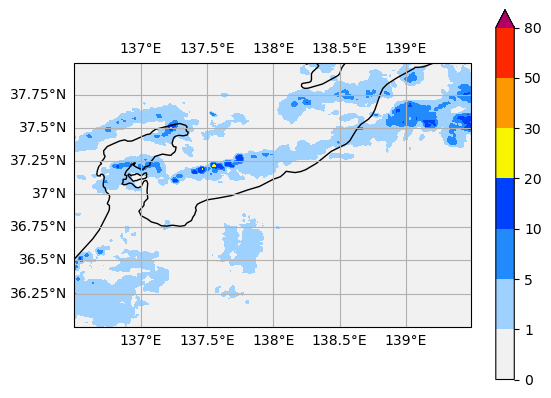

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([df.lon.min(), df.lon.max(), df.lat.min(), df.lat.max()], ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
contour = ax.contourf(
    df['lon'].unique(), df['lat'].unique(), df['202311291100'].values.reshape(df.lon.unique().shape[0],df.lat.unique().shape[0]).T, 
    transform=ccrs.PlateCarree(), 
    colors=jmacolors, levels=levels, extend='max')
plt.colorbar(contour)
plt.show()